# 多重线性回归

    有多个影响因素
$$
y = \beta_0x_0 + \beta_1x_1 + ... + \beta_nx_n + e
$$

## 1.载入库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

from sklearn import linear_model
import sklearn.datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics

## 2.载入数据，做基本的观察

In [2]:
diabetes = sklearn.datasets.load_diabetes()

In [3]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
diabetes.data[:10]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087],
       [-0.09269548, -0.04464164, -0.04069594, -0.01944183, -0.06899065,
        -0.07928784,  0.04127682, -0.0763945 , -0.04117617, -0.09634616],
       [-0.04547248,  0.05068012, -0.04716281, -0.01599898, -0.04009564,
        -0.02480001,  0.00077881, -0.03949338

In [6]:
diabetes.feature_names
# 所有的特征均已做过标准化处理，无需再进行数据预处理操作

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
diabetes.target[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [8]:
diabetes.data.shape

(442, 10)

## 3.拆分数据集

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data,
    diabetes.target,
    test_size = 0.3,
    random_state = 123456
)

In [10]:
X_train.shape

(309, 10)

## 4.实例化模型并训练

In [11]:
lin_model = linear_model.LinearRegression()
# 采用默认参数，拟合截距项，不对数据进行标准化处理

In [12]:
lin_model.fit(X_train, y_train)

LinearRegression()

查看模型结果

In [13]:
print('回归系数：', lin_model.coef_)

回归系数： [   0.88474871 -228.95463567  586.5254091   291.47621812 -720.85635046
  395.50854675  226.24725784  374.91439783  650.9243857    12.95680646]


In [14]:
print('截距：', lin_model.intercept_)

截距： 150.23218432491765


## 5.通过r方对回归模型的效果进行评估

### 5.1 通过lin_model.score方法进行计算

In [15]:
print(lin_model.score(X_test, y_test))
# 返回的是测试集上的r2，决定系数，取值范围[0,1]

0.5167052596617125


### 5.2 通过metrics中的r2_score方法进行计算

In [16]:
# 先获取预测结果
y_pred = lin_model.predict(X_test)

In [17]:
y_pred[:10]

array([ 98.24047116, 159.96923134, 162.47358018, 164.90105382,
       147.33217831,  69.99188569, 137.33034718, 155.06531615,
       243.11204632, 140.08205858])

In [18]:
print(sklearn.metrics.r2_score(y_test, y_pred))

0.5167052596617125


## 6.通过可视化观察每个影响因素对目标的影响大小

    思路：
    用每个影响因素和目标变量构建一个单独的回归方程，再进行带拟合线的散点图绘制和R2的计算

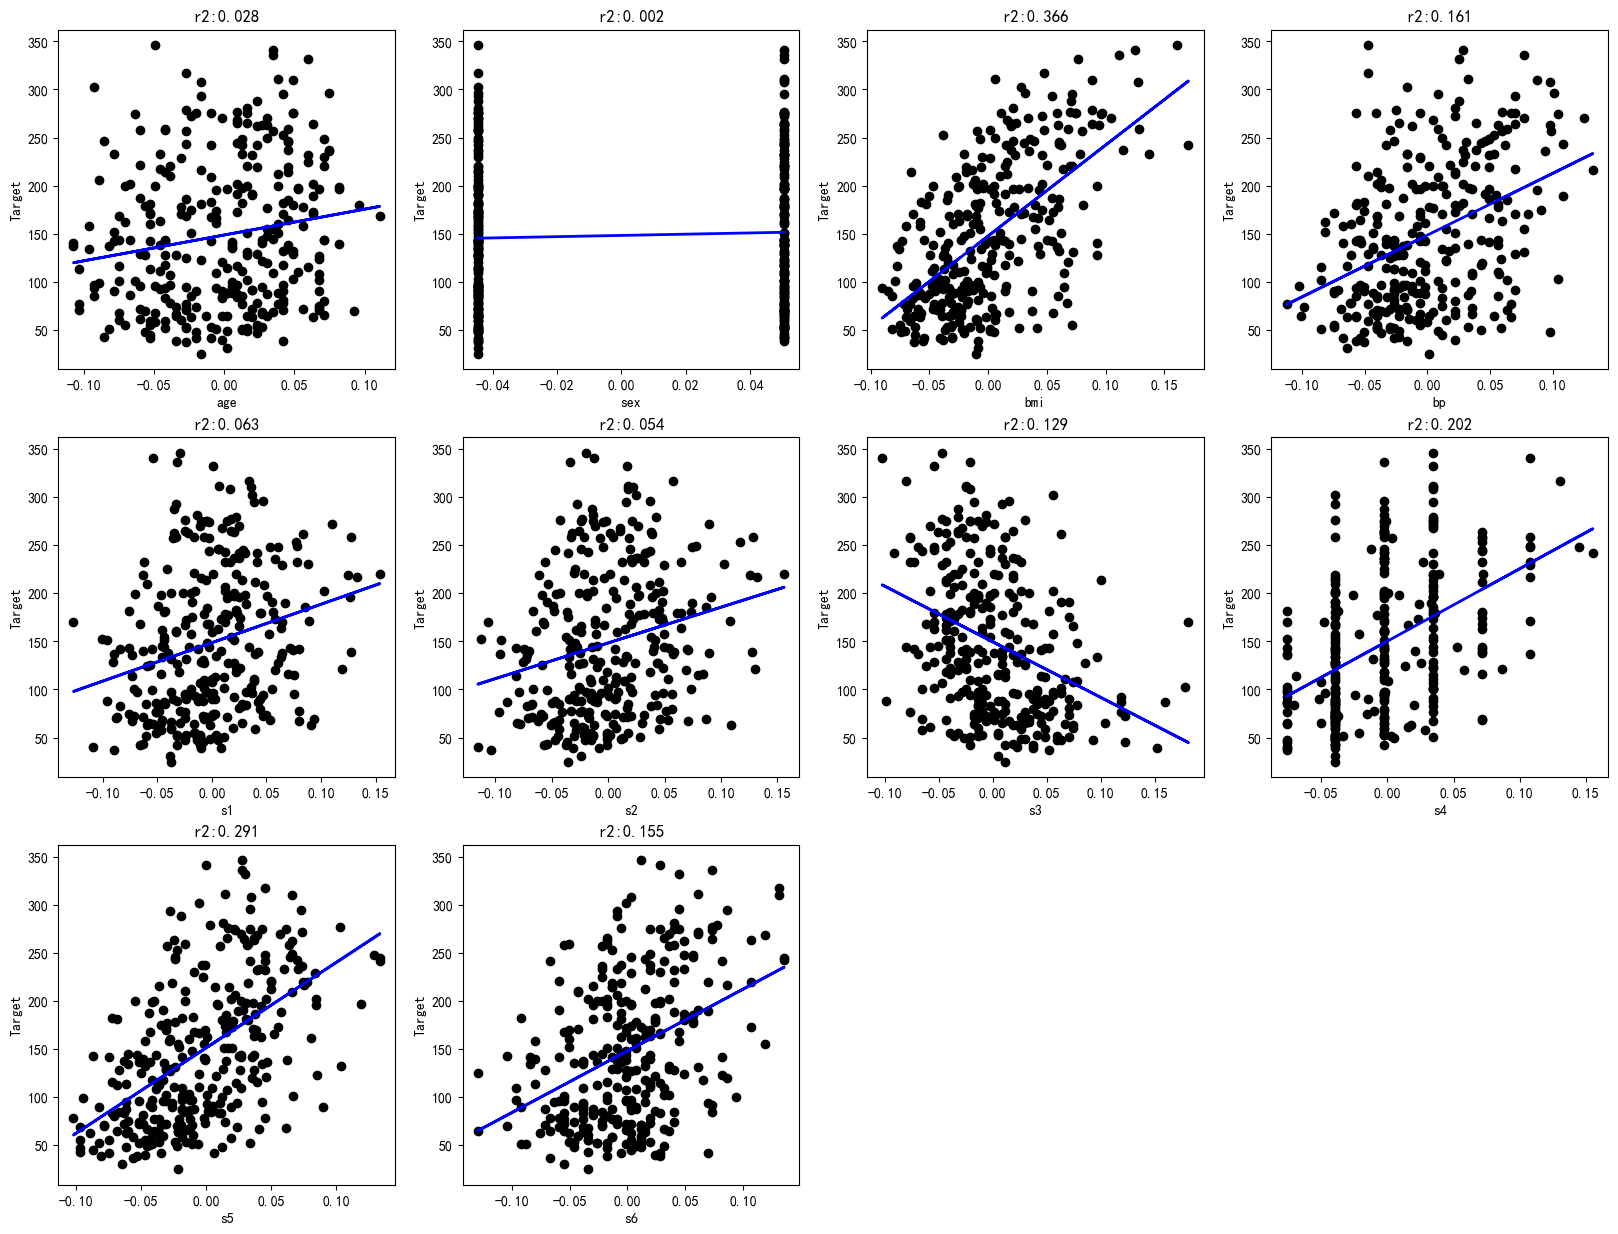

In [19]:
plt.figure(figsize = (20,15))
for i in range(10):
    # 遍历每个特征
    xi_train = X_train[:,i]
    # 提取每个特征对应的列
    # print(xi_train)
    # 将一维数组变为二维数组
    xi_train = xi_train[:,np.newaxis]
    # print(xi_train)
    lin_reg = linear_model.LinearRegression()
    # 针对每个特征进行训练
    lin_reg.fit(xi_train, y_train)
    
    r2_i = lin_reg.score(xi_train, y_train)
    # 计算每个特征对应的r2
    yi_pred = lin_reg.predict(xi_train)
    # 计算预测结果，以便绘制拟合线
    
    # 绘制散点图
    plt.subplot(3, 4, i + 1)
    plt.scatter(xi_train, y_train, color = 'k')
    
    # 绘制拟合线
    plt.plot(xi_train, yi_pred, color = 'b', lw = 2)
    
    # 辅助元素
    plt.xlabel(diabetes.feature_names[i])  # 特征名称
    plt.ylabel('Target')
    plt.title(f'r2:{round(r2_i,3)}')
    
plt.show()
# plt.show()代表整个图像绘制完成（所有子图），注意要放在循环外面

## 7.共线性问题：自变量之间的相互影响

把所有的特征构建成DataFrame

In [20]:
X_train.shape

(309, 10)

In [21]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [22]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [23]:
df_db = pd.DataFrame(
    diabetes.data,
    columns = diabetes.feature_names
)

In [24]:
df_db

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [25]:
# 加入目标变量
df_db['y'] = diabetes.target

In [26]:
df_db

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [27]:
# 观察相关系数矩阵
corr_matrix = df_db.corr().round(3)

In [28]:
corr_matrix

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
age,1.000,0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302,0.188
sex,0.174,1.000,0.088,0.241,0.035,0.143,-0.379,0.332,0.150,0.208,0.043
bmi,0.185,0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389,0.586
bp,0.335,0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390,0.441
s1,0.260,0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326,0.212
s2,0.219,0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291,0.174
s3,-0.075,-0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274,-0.395
s4,0.204,0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417,0.430
s5,0.271,0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465,0.566
s6,0.302,0.208,0.389,0.390,0.326,0.291,-0.274,0.417,0.465,1.000,0.382


<Axes: >

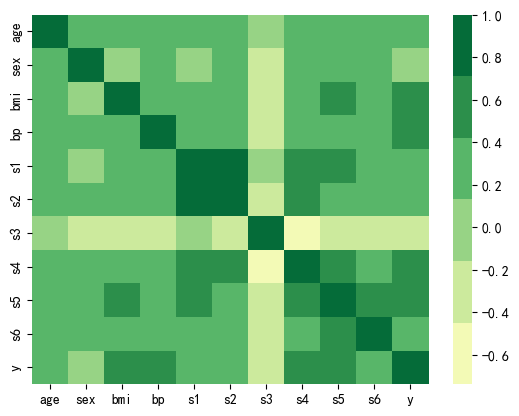

In [29]:
# 通过热力图观察自变量的相关情况
sns.heatmap(
    corr_matrix,
    cmap = sns.color_palette('YlGn')
)

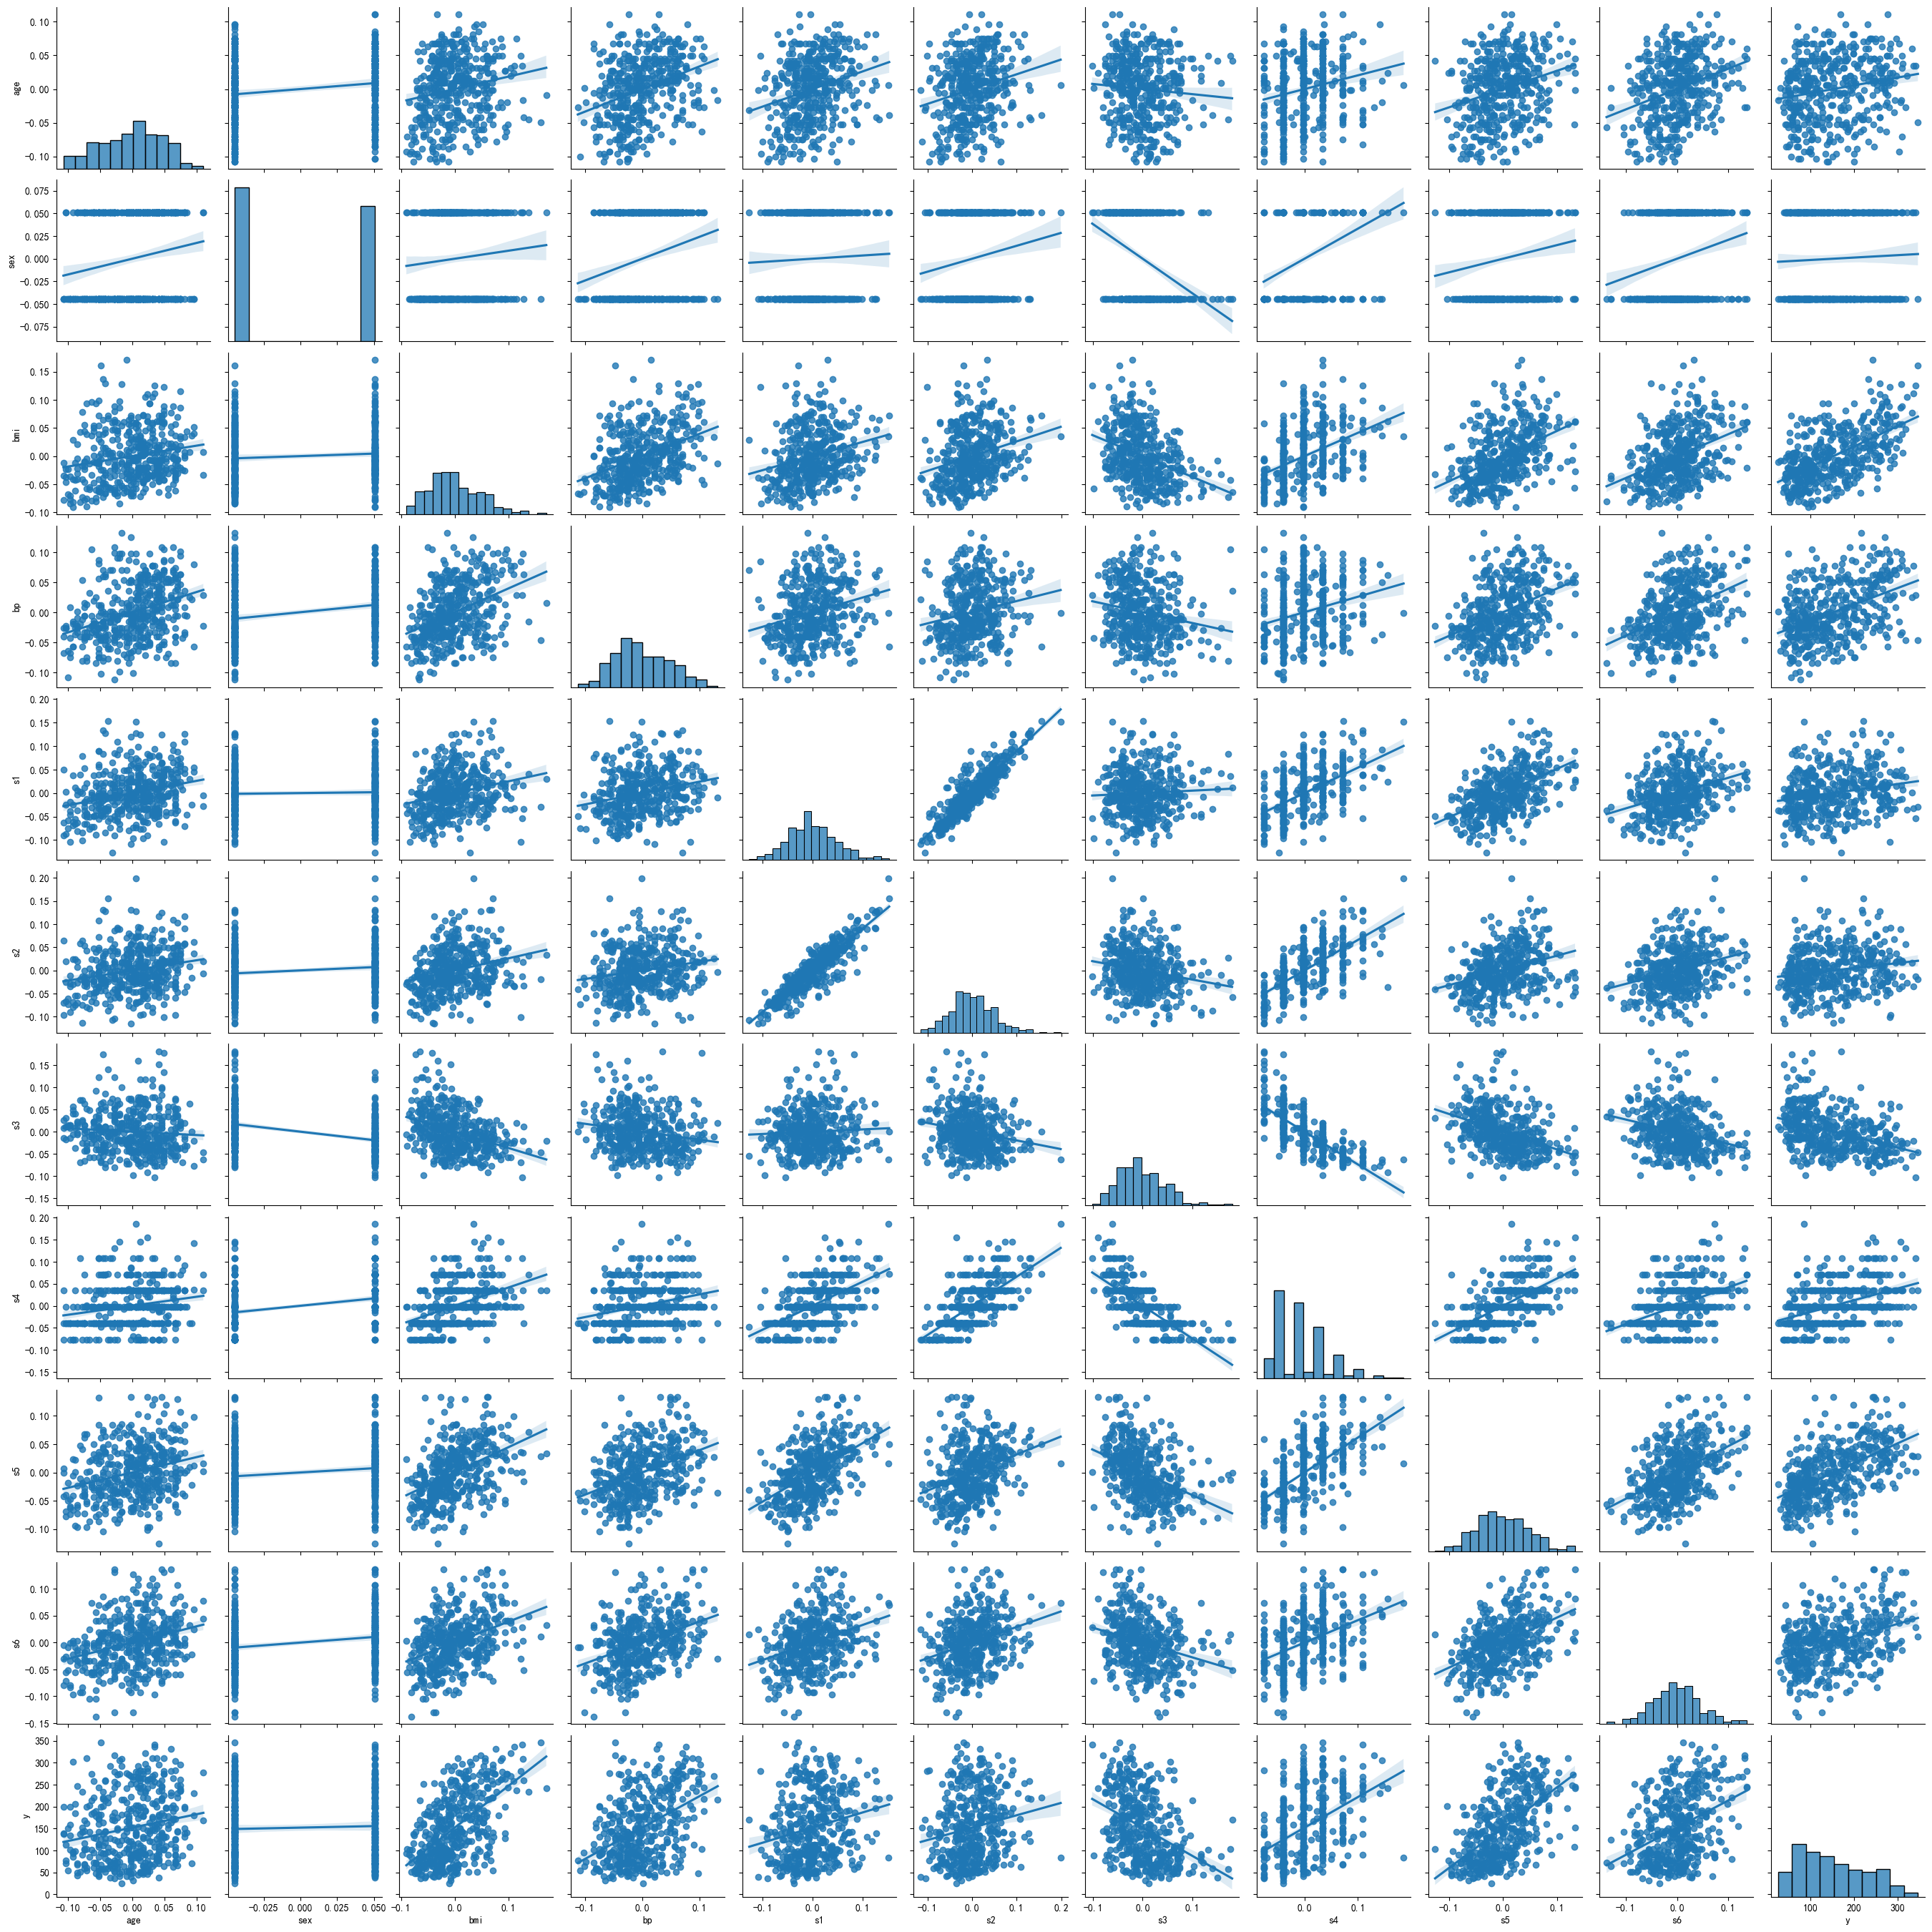

In [30]:
# 通过散点图矩阵进行观察
sns.pairplot(
    df_db,
    kind = 'reg'
)

## 8.线性回归模型的评估指标

    所有的评估指标都是描述预测的y值和实际的y值之间的差异

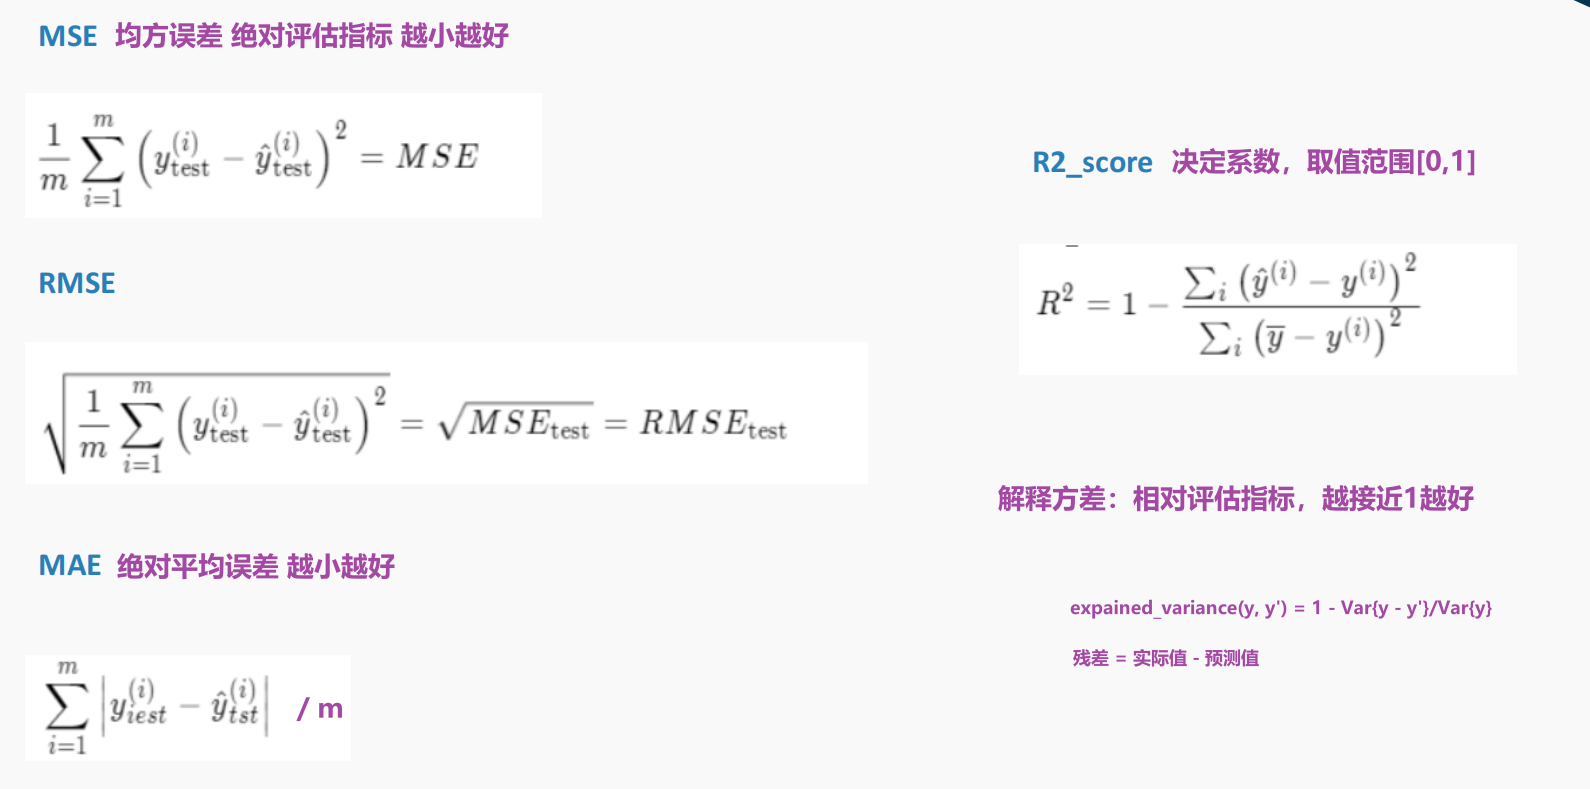

In [31]:
# 解释方差
print('解释方差：', sklearn.metrics.explained_variance_score(y_test, y_pred))

# 绝对平均误差
print('绝对平均误差MAE：', sklearn.metrics.mean_absolute_error(y_test, y_pred))

# 均方误差
print('均方误差MSE:', sklearn.metrics.mean_squared_error(y_test, y_pred))

# 决定系数
print('决定系数：', sklearn.metrics.r2_score(y_test, y_pred))

解释方差： 0.5232586862511454
绝对平均误差MAE： 44.542752485465854
均方误差MSE: 2944.3274575437854
决定系数： 0.5167052596617125


## 9.关于残差

    残差 = 实际值 - 预测值
    回归的充要条件：残差要符合正态分布
    相对误差 ：残差/实际值，再取平均

In [32]:
print('残差：', y_test - y_pred)

残差： [ -44.24047116   25.03076866   82.52641982   70.09894618  -62.33217831
  -14.99188569  114.66965282   96.93468385  -28.11204632   41.91794142
  -41.55497347    1.18447649   54.31721798  -42.91206848   88.76976522
  -25.96463533   -9.99007947    8.10317942  -14.77393014 -126.74067959
   64.61369293  100.55962781  -49.94607629  -67.80906762    0.60778506
   52.00398558    7.88152669   42.30908875   36.2059022  -109.91109116
  -34.70383197  102.20608883   51.19676845    5.99007012  -39.13267584
    1.38686022   -5.64107757  -37.39948063   58.45405758   29.87412042
   42.73488722  -53.10569535  -39.07495845  -25.14154413    8.8518781
   -2.45322157   96.11670332  -28.41616887    1.86834467   60.18888401
   41.83919613  -52.78981629   92.09109659   48.81939343   25.58684512
   11.77859496  -14.11137228  -48.62479451   47.83171188  -53.23670795
  108.83896539  -34.26012755  -61.61341224    9.92168996  -28.43894436
    7.07168692   11.20646176  -30.17814217   21.74095791  -50.70421877
  -

<Axes: ylabel='Count'>

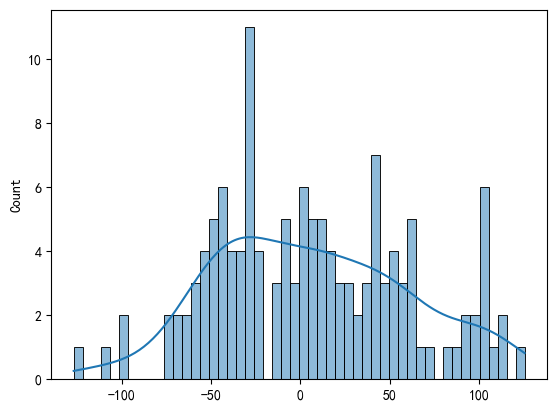

In [33]:
sns.histplot(y_test - y_pred, bins = 50, kde = True)

In [34]:
print('相对误差：', ((y_test - y_pred)/y_test).mean())

相对误差： -0.0969517748608125
